# Project

## Group members and Work Percentage

Arnas Juravicius   18257305    25%

Dylan Kearney      18227023    25%

Oisin McNamara     18237398    25%

Cyiaph McCann      17233453    25%

## Importing Python Modules and Dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import cluster

In [4]:
df = pd.read_csv('./parkinson_sample-1.csv')

In [5]:
df.head()

subject#  age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0         1   72    0     25.647       35.810    0.00340     0.000021   
1         1   72    0     75.657       39.340    0.00285     0.000013   
2         1   72    0     68.688       38.849    0.00340     0.000017   
3         1   72    0     61.669       38.353    0.00432     0.000029   
4         1   72    0     89.637       40.412    0.00290     0.000014   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.00178      0.00162     0.00533  ...        0.157       0.00711   
1     0.00109      0.00136     0.00327  ...        0.089       0.00456   
2     0.00161      0.00174     0.00482  ...        0.316       0.02120   
3     0.00156      0.00207     0.00468  ...        0.371       0.01774   
4     0.00124      0.00142     0.00371  ...        0.173       0.00862   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.00765        0.00926      0.02132  0.016636  25.986  0.42271   
1       0.00584        0.00937      0.01367  0.004981  27.984  0.35842   
2       0.02195        0.03069      0.06360  0.005567  25.399  0.45462   
3       0.02134        0.03451      0.05323  0.013381  22.078  0.51563   
4       0.01156        0.01737      0.02585  0.005320  27.200  0.44967   

       DFA      PPE  
0  0.56963  0.11774  
1  0.52350  0.17555  
2  0.56983  0.16291  
3  0.61864  0.20037  
4  0.54700  0.18939  

[5 rows x 21 columns]

In [6]:
df.tail()

subject#  age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  \
2095        42   61    0    65.7570       34.657    0.00306     0.000025   
2096        42   61    0   106.7600       36.029    0.00249     0.000019   
2097        42   61    0    -4.2597       28.634    0.00352     0.000027   
2098        42   61    0   115.6500       35.402    0.00769     0.000066   
2099        42   61    0   156.8200       32.495    0.00387     0.000032   

      Jitter:RAP  Jitter:PPQ5  Jitter:DDP  ...  Shimmer(dB)  Shimmer:APQ3  \
2095     0.00140      0.00167     0.00421  ...        0.167       0.00805   
2096     0.00124      0.00123     0.00373  ...        0.130       0.00775   
2097     0.00125      0.00169     0.00376  ...        0.159       0.00739   
2098     0.00407      0.00425     0.01222  ...        0.162       0.00789   
2099     0.00186      0.00213     0.00557  ...        0.221       0.01345   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
2095       0.00885        0.01335      0.02416  0.019214  24.689  0.55307   
2096       0.00868        0.01144      0.02326  0.011046  24.737  0.52205   
2097       0.00914        0.01465      0.02216  0.009635  24.315  0.58904   
2098       0.00892        0.01439      0.02367  0.062794  23.240  0.54095   
2099       0.01573        0.02115      0.04035  0.008337  23.411  0.44308   

          DFA      PPE  
2095  0.57152  0.11229  
2096  0.57030  0.11601  
2097  0.57961  0.16296  
2098  0.59527  0.15142  
2099  0.64552  0.17985  

[5 rows x 21 columns]

We notice that subject represents the identification number of the subject. This information is not relevant so it can be removed. Each row can be treated as an individual test even if it is the same subject. 

In [7]:
df = df.drop('subject#', axis=1)

In [8]:
df.head()

age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     25.647       35.810    0.00340     0.000021     0.00178   
1   72    0     75.657       39.340    0.00285     0.000013     0.00109   
2   72    0     68.688       38.849    0.00340     0.000017     0.00161   
3   72    0     61.669       38.353    0.00432     0.000029     0.00156   
4   72    0     89.637       40.412    0.00290     0.000014     0.00124   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00162     0.00533  0.01452        0.157       0.00711       0.00765   
1      0.00136     0.00327  0.00979        0.089       0.00456       0.00584   
2      0.00174     0.00482  0.03739        0.316       0.02120       0.02195   
3      0.00207     0.00468  0.04296        0.371       0.01774       0.02134   
4      0.00142     0.00371  0.01911        0.173       0.00862       0.01156   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.00926      0.02132  0.016636  25.986  0.42271  0.56963  0.11774  
1        0.00937      0.01367  0.004981  27.984  0.35842  0.52350  0.17555  
2        0.03069      0.06360  0.005567  25.399  0.45462  0.56983  0.16291  
3        0.03451      0.05323  0.013381  22.078  0.51563  0.61864  0.20037  
4        0.01737      0.02585  0.005320  27.200  0.44967  0.54700  0.18939

We also notice that the test_time column is not providing any relevant data. This means we can drop this column from the dataset. 

## Exploratory Data Analysis

In [9]:
print(df.min())

age              36.000000
sex               0.000000
test_time        -4.262500
total_UPDRS       7.000000
Jitter(%)         0.000900
Jitter(Abs)       0.000002
Jitter:RAP        0.000400
Jitter:PPQ5       0.000450
Jitter:DDP        0.001210
Shimmer           0.003060
Shimmer(dB)       0.026000
Shimmer:APQ3      0.001610
Shimmer:APQ5      0.001940
Shimmer:APQ11     0.002490
Shimmer:DDA       0.004840
NHR               0.000304
HNR               1.659000
RPDE              0.151020
DFA               0.519770
PPE               0.021983
dtype: float64


Here we noticed that test_time has at least one negative value. This will need to be explored at a later stage

In [10]:
pd.set_option('display.max_columns', None)
df.describe()

age          sex    test_time  total_UPDRS    Jitter(%)  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean     64.404762     0.333333    93.393790    28.525276     0.006031   
std       9.131039     0.471517    53.669701    10.673869     0.005389   
min      36.000000     0.000000    -4.262500     7.000000     0.000900   
25%      58.000000     0.000000    47.217750    21.110000     0.003490   
50%      65.000000     0.000000    92.333000    27.213500     0.004770   
75%      72.000000     1.000000   140.320000    35.392250     0.006632   
max      85.000000     1.000000   215.490000    54.992000     0.089290   

       Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP      Shimmer  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean      0.000043     0.002920     0.003212     0.008759     0.033489   
std       0.000034     0.002997     0.003691     0.008992     0.026101   
min       0.000002     0.000400     0.000450     0.001210     0.003060   
25%       0.000022     0.001557     0.001760     0.004667     0.018687   
50%       0.000033     0.002200     0.002420     0.006590     0.026980   
75%       0.000052     0.003250     0.003420     0.009750     0.039350   
max       0.000389     0.057540     0.069560     0.172630     0.239150   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  2100.000000   2100.000000   2100.000000    2100.000000  2100.000000   
mean      0.305911      0.016903      0.019812       0.027102     0.050710   
std       0.232377      0.013523      0.016926       0.020530     0.040568   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.170000      0.008997      0.010530       0.015357     0.026985   
50%       0.247000      0.013430      0.015570       0.022205     0.040295   
75%       0.362000      0.020390      0.023428       0.032445     0.061172   
max       1.970000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000  
mean      0.031594    21.747740     0.538971     0.652299     0.217377  
std       0.060153     4.292231     0.102144     0.070405     0.092894  
min       0.000304     1.659000     0.151020     0.519770     0.021983  
25%       0.010521    19.500250     0.465392     0.595222     0.152380  
50%       0.017671    21.982000     0.540975     0.642460     0.200170  
75%       0.030517    24.491250     0.613270     0.708835     0.263622  
max       0.748260    37.187000     0.935070     0.865600     0.731520

In [11]:
df.isna().sum()

age              0
sex              0
test_time        0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

From this we can see there are no missing values.

## Plotting Attributes

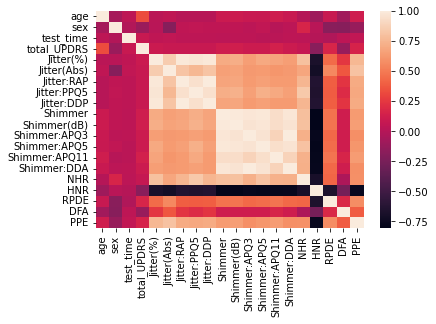

In [12]:
sns.heatmap(df.corr());

This heatmap doesn't give us a lot of useful information due to the number of attributes in the dataset

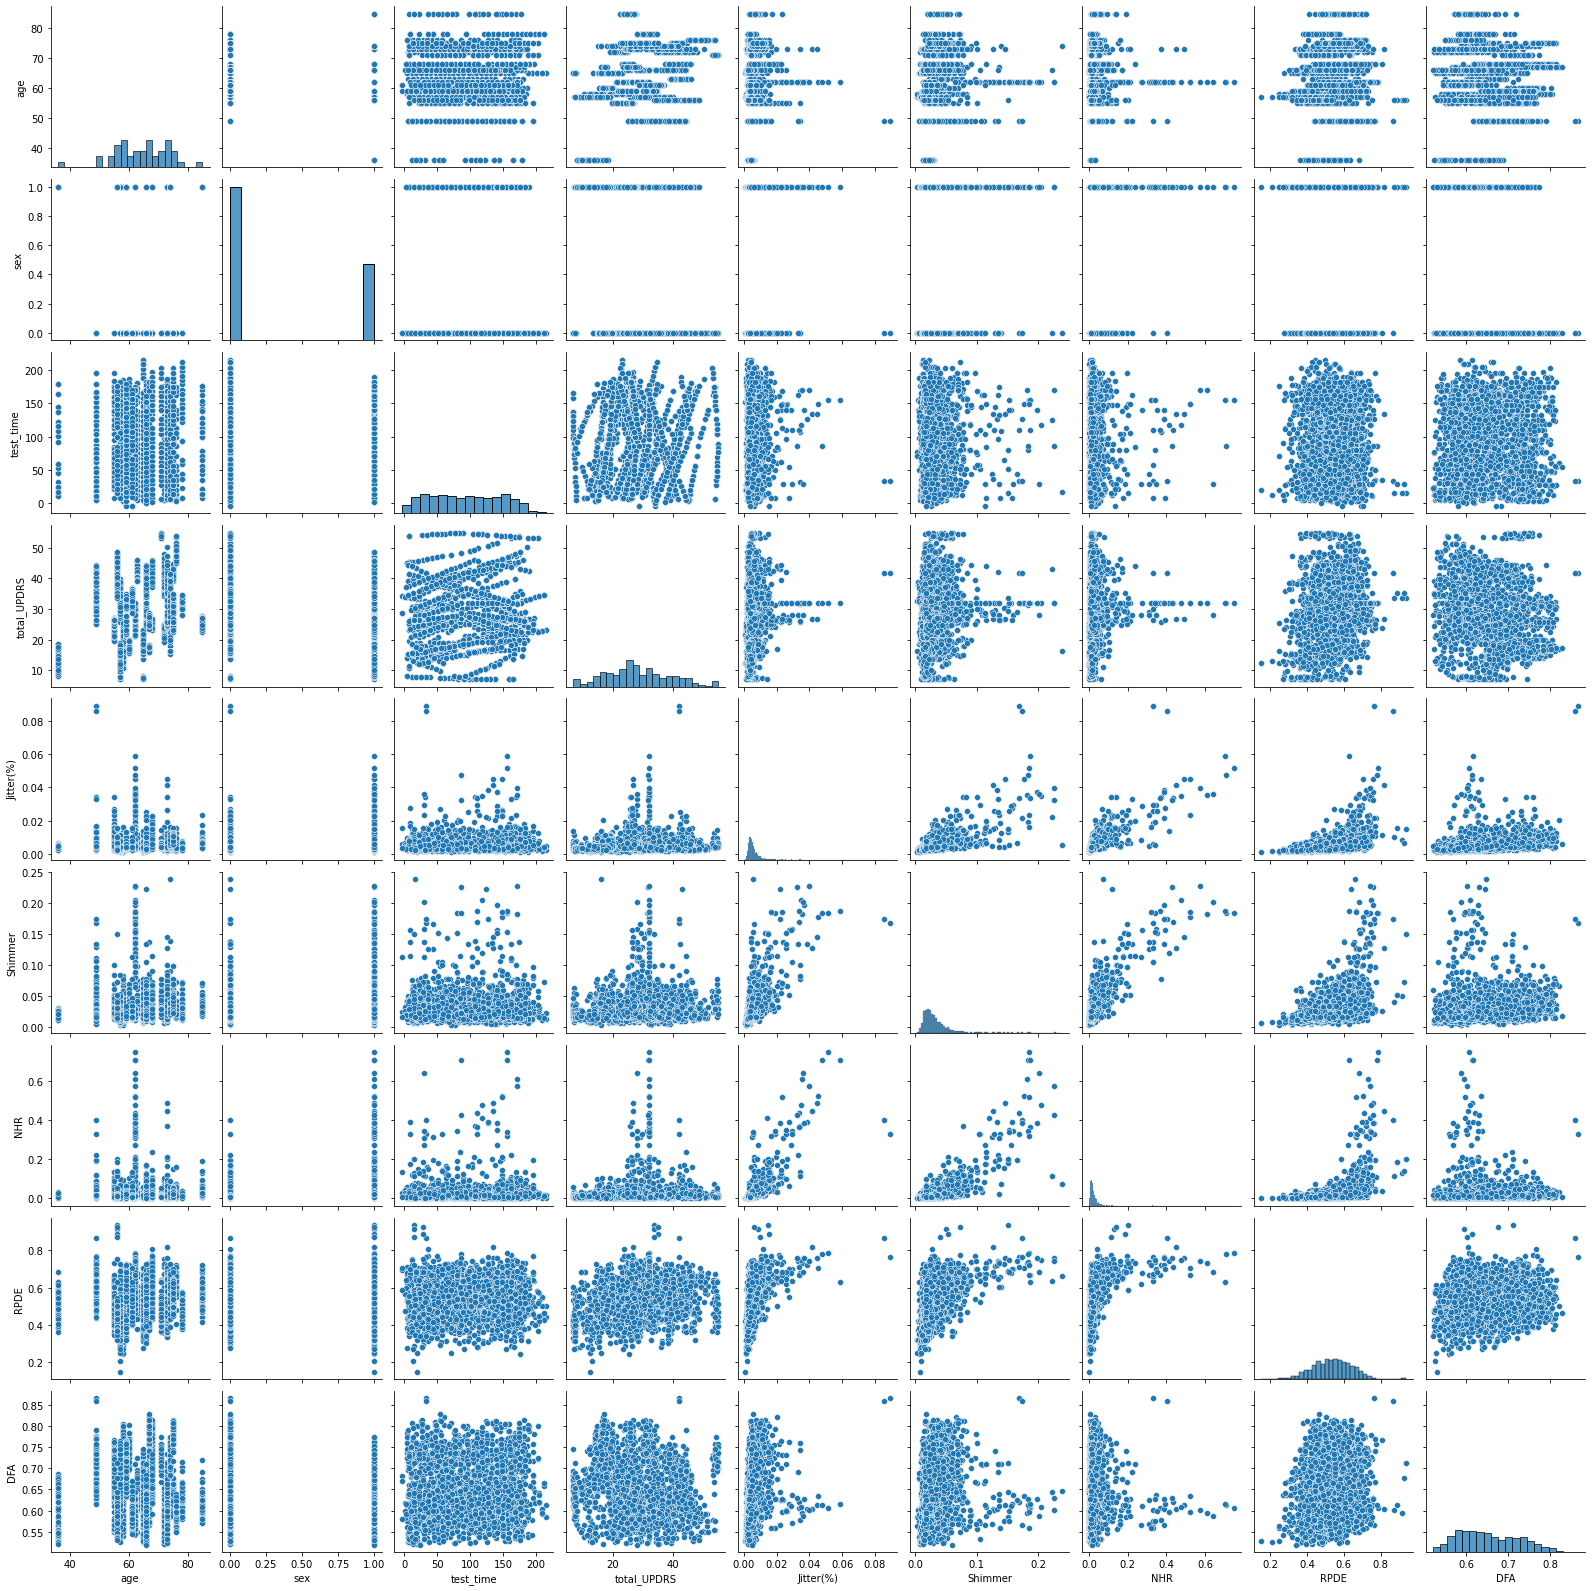

In [13]:
sns.pairplot(data=df[["age","sex","test_time","total_UPDRS","Jitter(%)","Shimmer","NHR","RPDE","DFA"]])
plt.show()

We made the following observations from the pairplots:

 - Higher test time leads to higher jitter %
 - There is almost double the amount of males than females (could indicate that males are more likely to get parkinsons
 - Higher RDPE leads to a higher NHR and Jitter(%)
 - Higher Shimmer leads to a higher NHR and RDPE

We decided to drop the test_time column as we wanted to treat each row/entry as an individual test

In [29]:
df = df.drop('test_time', axis=1)

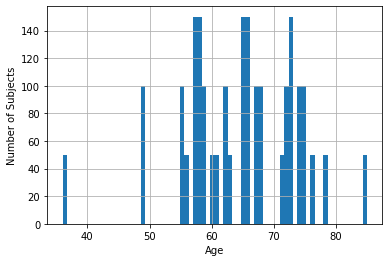

In [14]:
df['age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.show()

Age appears to be center skewed

In [15]:
df['sex'].value_counts()

0    1400
1     700
Name: sex, dtype: int64

### Investigate for Outliers

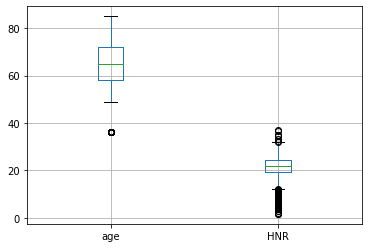

In [36]:
df.boxplot(column=["age", "HNR"])
plt.show()

We notice that HNR as multiple outliers.

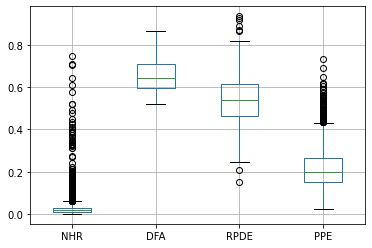

In [42]:
df.boxplot(column=[ "NHR", "DFA", "RPDE", "PPE"])
plt.show()

We noticed that NHR, RPDE, and, PPE has multiple outliers also.

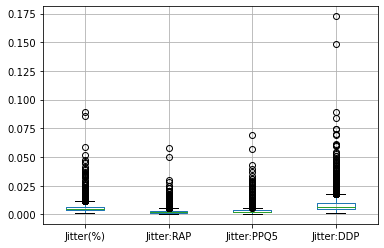

In [44]:
df.boxplot(column=["Jitter(%)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP"])
plt.show()

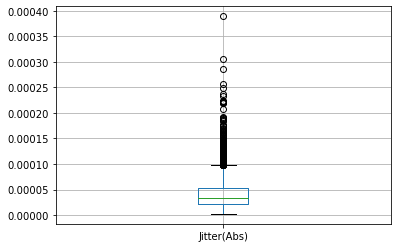

In [43]:
df.boxplot(column=["Jitter(Abs)"])
plt.show()

All of the Jitter attributes have outliers.

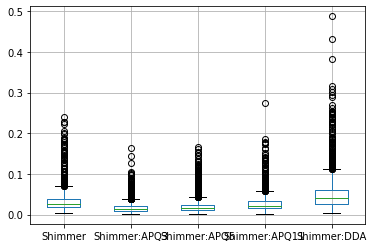

In [46]:
df.boxplot(column=["Shimmer", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11", "Shimmer:DDA"])
plt.show()

All of the Shimmer attributes also have outliers.
    

### Scaling the Data

In [50]:
# first we scale the data with outliers
# we use the robust scaler to preserve the data as we scale it
robust_scaler = RobustScaler()
columns_with_outliers = ["NHR", "HNR", "RPDE", "PPE",
                         "Jitter(%)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP", "Jitter(Abs)",
                         "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11", "Shimmer:DDA"]

df[columns_with_outliers] = robust_scaler.fit_transform(df[columns_with_outliers])

In [55]:
# next we scale the data without any outliers
# we use the standard scaler
standard_scaler = StandardScaler()
df[["age", "DFA"]] = standard_scaler.fit_transform(df[["age", "DFA"]])

### Treating Columns with Outliers

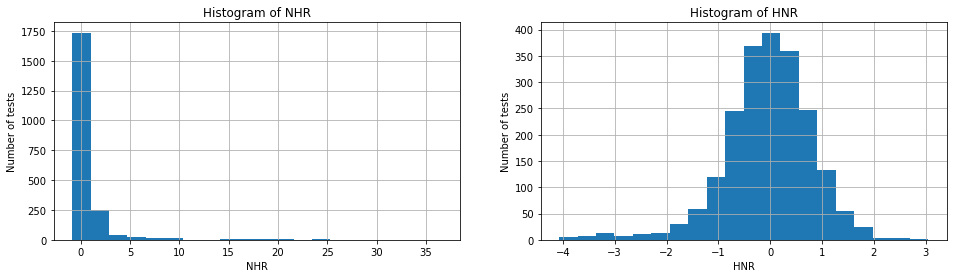

In [56]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot NHR
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of NHR")
ax1.set_xlabel('NHR')
ax1.set_ylabel('Number of tests')
df['NHR'].hist(bins=20)

# Plot HNR
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of HNR")
ax3.set_xlabel('HNR')
ax3.set_ylabel('Number of tests')
df['HNR'].hist(bins=20)

plt.show()

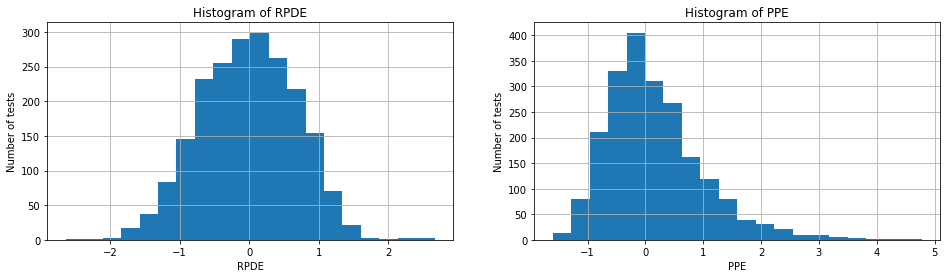

In [58]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot RPDE
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of RPDE")
ax1.set_xlabel('RPDE')
ax1.set_ylabel('Number of tests')
df['RPDE'].hist(bins=20)

# Plot PPE
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of PPE")
ax3.set_xlabel('PPE')
ax3.set_ylabel('Number of tests')
df['PPE'].hist(bins=20)

plt.show()

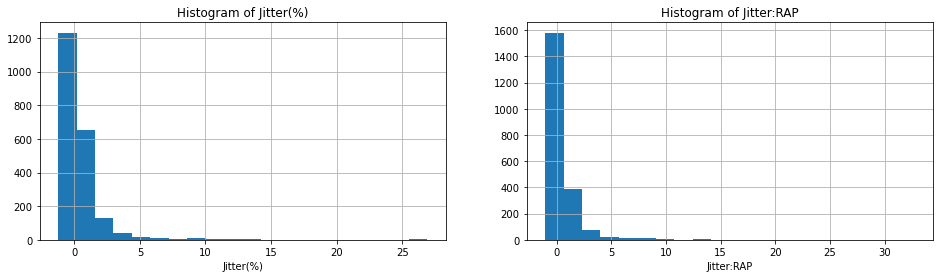

In [66]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Jitter(%)
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Jitter(%)")
ax1.set_xlabel('Jitter(%)')
df['Jitter(%)'].hist(bins=20)

# Plot Jitter:RAP
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of Jitter:RAP")
ax2.set_xlabel('Jitter:RAP')
df['Jitter:RAP'].hist(bins=20)
    
plt.show()

<AxesSubplot:title={'center':'Histogram of Jitter:DDP'}, xlabel='Jitter:DDP'>

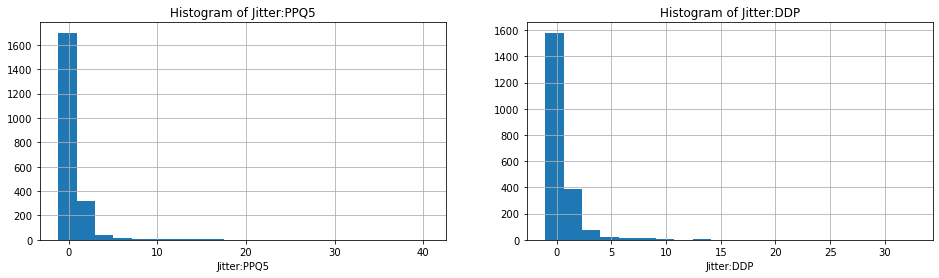

In [68]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Jitter:PPQ5
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Jitter:PPQ5")
ax3.set_xlabel('Jitter:PPQ5')
df['Jitter:PPQ5'].hist(bins=20)

# Plot Jitter:DDP
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Jitter:DDP")
ax3.set_xlabel('Jitter:DDP')
df['Jitter:DDP'].hist(bins=20)

plt.show()

<AxesSubplot:title={'center':'Histogram of Shimmer'}, xlabel='Shimmer'>

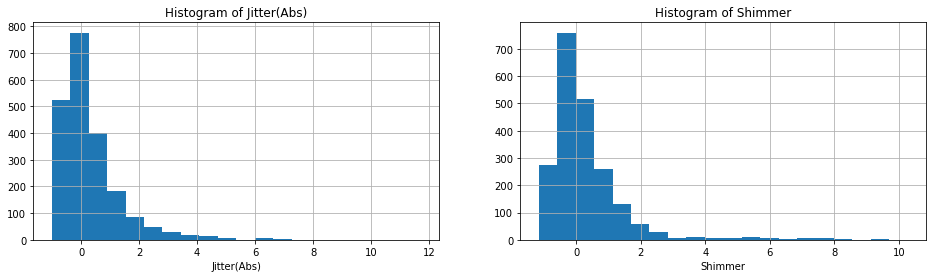

In [69]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Jitter(Abs)
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Jitter(Abs)")
ax3.set_xlabel('Jitter(Abs)')
df['Jitter(Abs)'].hist(bins=20)

# Plot Shimmer
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Shimmer")
ax3.set_xlabel('Shimmer')
df['Shimmer'].hist(bins=20)

plt.show()

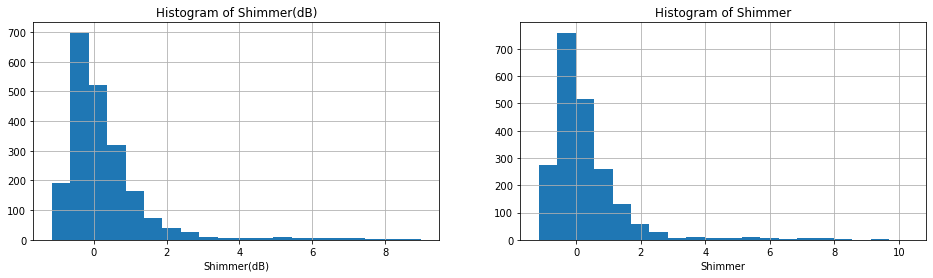

In [71]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Shimmer(dB)
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Shimmer(dB)")
ax3.set_xlabel('Shimmer(dB)')
df['Shimmer(dB)'].hist(bins=20)

# Plot Shimmer
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Shimmer")
ax3.set_xlabel('Shimmer')
df['Shimmer'].hist(bins=20)

plt.show()

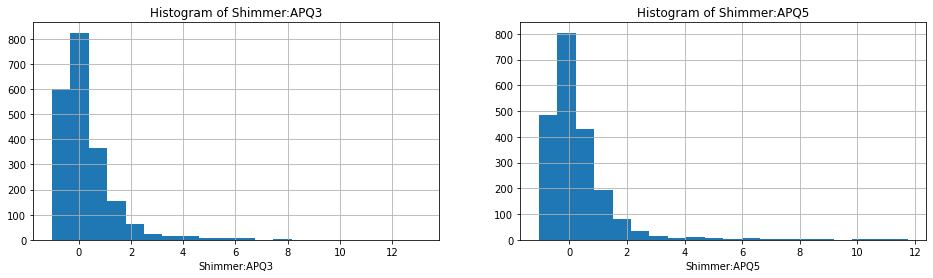

In [72]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Shimmer:APQ3
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Shimmer:APQ3")
ax3.set_xlabel('Shimmer:APQ3')
df['Shimmer:APQ3'].hist(bins=20)

# Plot Shimmer:APQ5
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Shimmer:APQ5")
ax3.set_xlabel('Shimmer:APQ5')
df['Shimmer:APQ5'].hist(bins=20)

plt.show()

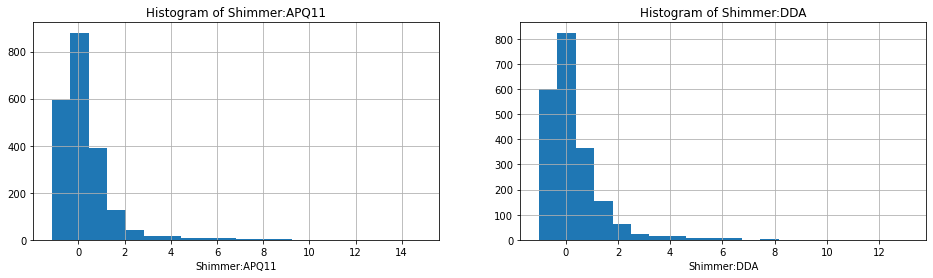

In [74]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Shimmer:APQ11
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Shimmer:APQ11")
ax3.set_xlabel('Shimmer:APQ11')
df['Shimmer:APQ11'].hist(bins=20)

# Plot Shimmer:DDA
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Shimmer:DDA")
ax3.set_xlabel('Shimmer:DDA')
df['Shimmer:DDA'].hist(bins=20)

plt.show()

We discovered that those columns with the outliers, after robust scaling them the only ones that dont need log transformation are HNR and RPDE.

In [80]:
df[["NHR", "PPE", "Jitter(%)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP", "Jitter(Abs)", 
    "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11", "Shimmer:DDA"]].min()

NHR              0.615952
PPE              0.954823
Jitter(%)        0.801327
Jitter:RAP       0.720995
Jitter:PPQ5      0.776215
Jitter:DDP       0.713650
Jitter(Abs)     -0.008125
Shimmer         -0.007682
Shimmer(dB)     -0.001042
Shimmer:APQ3    -0.007553
Shimmer:APQ5    -0.006817
Shimmer:APQ11   -0.003774
Shimmer:DDA     -0.007100
dtype: float64

In [77]:
df['NHR'] = np.log(df['NHR']+1.86)
df['PPE'] = np.log(df['PPE']+2.6)
df['Jitter(%)'] = np.log(df['Jitter(%)']+2.23)
df['Jitter:RAP'] = np.log(df['Jitter:RAP']+2.06)
df['Jitter:PPQ5'] = np.log(df['Jitter:PPQ5']+2.18)
df['Jitter:DDP'] = np.log(df['Jitter:DDP']+2.05)
df['Jitter(Abs)'] = np.log(df['Jitter(Abs)']+2.01)
df['Shimmer'] = np.log(df['Shimmer']+2.15)
df['Shimmer(dB)'] = np.log(df['Shimmer(dB)']+2.15)
df['Shimmer:APQ3'] = np.log(df['Shimmer:APQ3']+2.03)
df['Shimmer:APQ5'] = np.log(df['Shimmer:APQ5']+2.05)
df['Shimmer:APQ11'] = np.log(df['Shimmer:APQ11']+2.15)
df['Shimmer:DDA'] = np.log(df['Shimmer:DDA']+2.03)

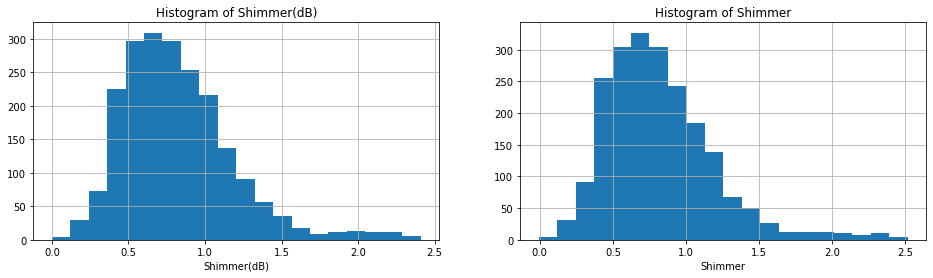

In [78]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot Shimmer(dB)
ax3 = fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram of Shimmer(dB)")
ax3.set_xlabel('Shimmer(dB)')
df['Shimmer(dB)'].hist(bins=20)

# Plot Shimmer
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Shimmer")
ax3.set_xlabel('Shimmer')
df['Shimmer'].hist(bins=20)

plt.show()

## K-Means Clustering

In [96]:
colors = np.array(['orange', 'blue', 'lime', 'purple', 'khaki', 'pink', 'green', 'purple'])
def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [91]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import manifold
data = np.array(df.values, dtype=float)
for n_cluster in range(2, 11):
    clustered_data_sklearn = KMeans(n_clusters=n_cluster).fit(data)
    label = clustered_data_sklearn.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5270202500137563
For n_clusters=3, The Silhouette Coefficient is 0.49669855312705163
For n_clusters=4, The Silhouette Coefficient is 0.44977467453232706
For n_clusters=5, The Silhouette Coefficient is 0.44098201313939994
For n_clusters=6, The Silhouette Coefficient is 0.4276812617882978
For n_clusters=7, The Silhouette Coefficient is 0.407032715143856
For n_clusters=8, The Silhouette Coefficient is 0.3758927376508281
For n_clusters=9, The Silhouette Coefficient is 0.3296869019076463
For n_clusters=10, The Silhouette Coefficient is 0.3091652523348419


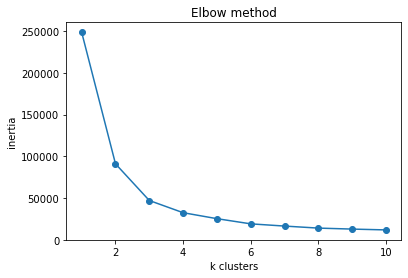

In [83]:
inertia = []

for n_clusters in range(1,11):
    clustered_data_sklearn = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init=30, max_iter=100)
    clustered_data_sklearn.fit(data)
    inertia.append(clustered_data_sklearn.inertia_)
    
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('k clusters')
plt.ylabel('inertia')
plt.show()
    

In [98]:
k = 2

In [99]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=150).fit(data)

In [100]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [101]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


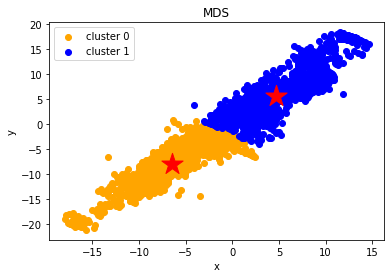

In [102]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [103]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


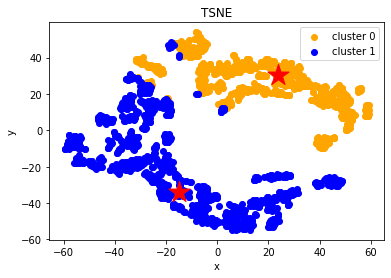

In [104]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')